## The Spark Foundation-GRIP-Data science and Business Analystics-January-2022

### Task 1: Prediction using superivised ML

Author: Ghulam Muhammad Umar

DataSet link:http://bit.ly/w-data

#### Problem: Predict the percentage of an student based on the no of Study hours.

### Import libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [64]:
pwd

'C:\\Users\\umar\\OneDrive\\Desktop'

In [65]:
cd C:\Users\umar\OneDrive\Desktop

C:\Users\umar\OneDrive\Desktop


In [66]:
df = pd.read_csv('student_scores - student_scores.csv')

In [67]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [68]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [69]:
df.shape

(25, 2)

### Discrover and visualize data the to gain  insights

In [70]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [71]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


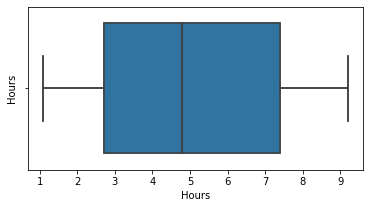

In [94]:
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(df.Hours)
plt.ylabel('Hours')
sns.boxplot(x=df['Hours'])
plt.show()

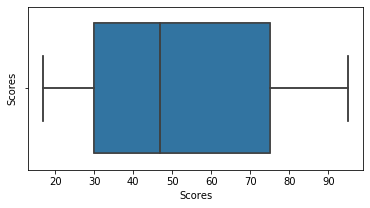

In [95]:
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(df.Scores)
plt.ylabel('Scores')
sns.boxplot(x=df['Scores'])
plt.show()

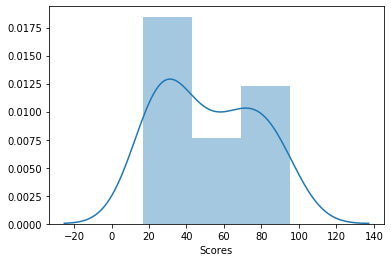

In [75]:
sns.distplot(df["Scores"])

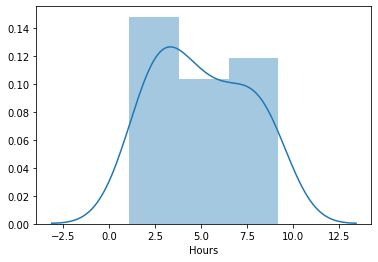

In [76]:
 sns.distplot(df["Hours"])

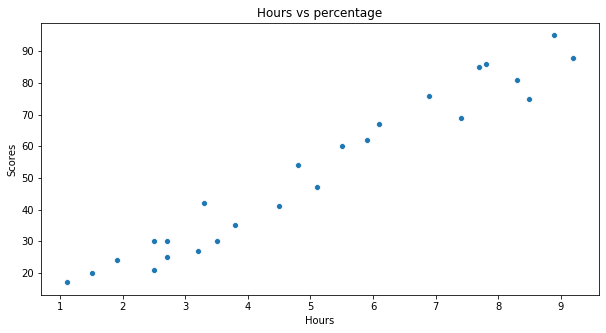

In [98]:
plt.figure(figsize=(10,5))
plt.title('Hours vs percentage')
plt.xlabel('Score')
plt.ylabel('percentage')
sns.scatterplot(df['Hours'],df['Scores'])
plt.show()

we can see that there is positive linear relatioship between Hours and percentage

### Split the dataset

In [78]:
# specify input and output attributes
X = df.drop(columns=['Scores'], axis=1)
y = df.drop(columns=['Hours'], axis=1)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("shape of x_train",x_train.shape)
print("shape of  x_test",x_test.shape)
print("shape of  y_train",y_train.shape)
print("shape of  y_test",y_test.shape)


shape of x_train (18, 1)
shape of  x_test (7, 1)
shape of  y_train (18, 1)
shape of  y_test (7, 1)


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
linear_regressor = LinearRegression()

In [82]:
linear_regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
linear_regressor.coef_

array([[9.71409219]])

In [84]:
linear_regressor.intercept_

array([2.48036709])

In [85]:
Y_pred = linear_regressor.predict(x_test)
Y_pred

array([[83.10733229],
       [26.76559757],
       [26.76559757],
       [69.50760322],
       [59.79351103],
       [28.70841601],
       [34.53687133]])

In [86]:
Y_predd = linear_regressor.predict(X)
Y_predd

array([[26.76559757],
       [52.02223727],
       [33.56546211],
       [85.05015073],
       [36.47968977],
       [17.05150538],
       [91.85001526],
       [55.90787415],
       [83.10733229],
       [28.70841601],
       [77.27887697],
       [59.79351103],
       [46.19378196],
       [34.53687133],
       [13.1658685 ],
       [88.93578761],
       [26.76559757],
       [20.93714226],
       [61.73632947],
       [74.36464932],
       [28.70841601],
       [49.10800962],
       [39.39391742],
       [69.50760322],
       [78.25028619]])

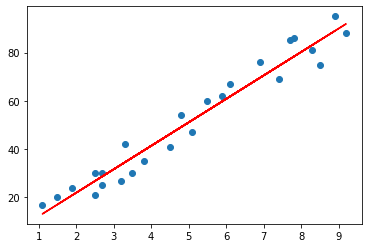

In [87]:
plt.scatter(X, y)
plt.plot(X, Y_predd, color='red')
plt.show()

In [88]:
pd.DataFrame(np.c_[x_test,y_test,Y_pred],columns=['Hours','Scores','Prediction'])

,Hours,Scores,Prediction
0,8.3,81.0,83.107332
1,2.5,30.0,26.765598
2,2.5,21.0,26.765598
3,6.9,76.0,69.507603
4,5.9,62.0,59.793511
5,2.7,25.0,28.708416
6,3.3,42.0,34.536871


In [89]:
hours = 9.25
own_pred = linear_regressor.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.33571987]


In [102]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Y_pred)) 
 

Mean Absolute Error: 4.425394675156183


In [104]:
import joblib
joblib.dump(linear_regressor,'Student_Marks_Predictor_Model.pkl')

['Student_Marks_Predictor_Model.pkl']